In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Books_Data_Clean.csv')

In [4]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [5]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [7]:
df = df[df["Publishing Year"] > 1900]

In [8]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [12]:
df.dropna(subset = "Book Name", inplace = True)

C:\Users\dell\AppData\Local\Temp\ipykernel_17436\552555317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = "Book Name", inplace = True)


In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

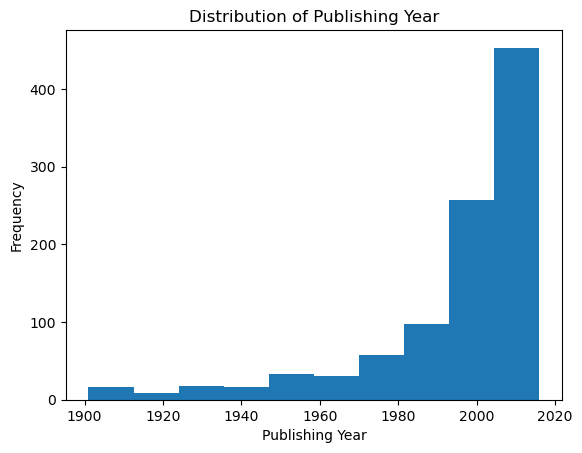

In [15]:
plt.hist(df["Publishing Year"])
plt.title("Distribution of Publishing Year")
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.show()

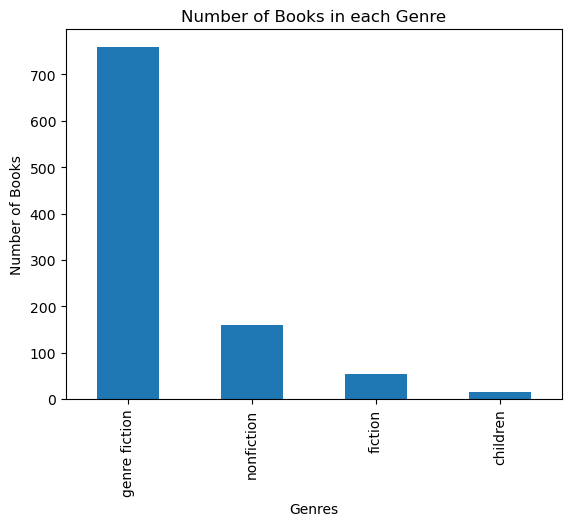

In [18]:
df["genre"].value_counts().plot(kind='bar')
plt.title("Number of Books in each Genre")
plt.xlabel("Genres")
plt.ylabel("Number of Books")
plt.show()

In [21]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

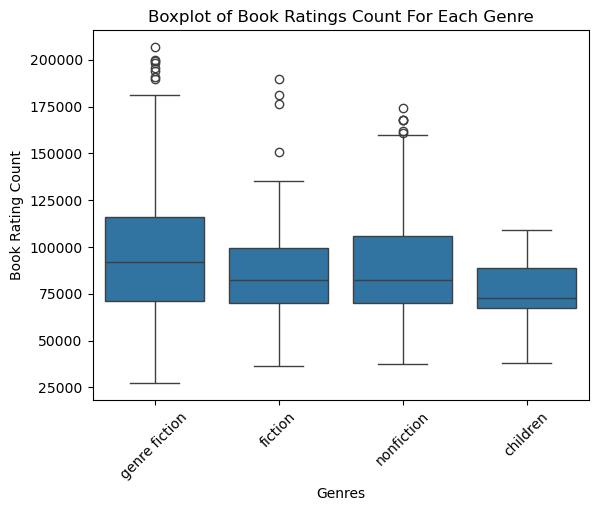

In [23]:
sns.boxplot(x = "genre", y = "Book_ratings_count", data = df)
plt.title("Boxplot of Book Ratings Count For Each Genre")
plt.xlabel("Genres")
plt.ylabel("Book Rating Count")
plt.xticks(rotation=45)
plt.show()

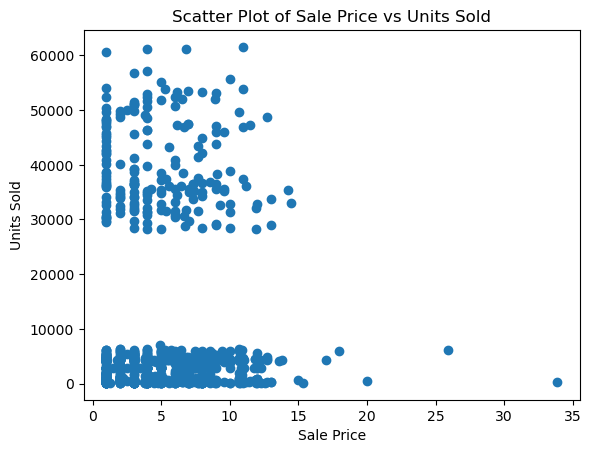

In [24]:
plt.scatter(df["sale price"], df["units sold"])
plt.title("Scatter Plot of Sale Price vs Units Sold")
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.show()

In [27]:
language_counts = df["language_code"].value_counts()

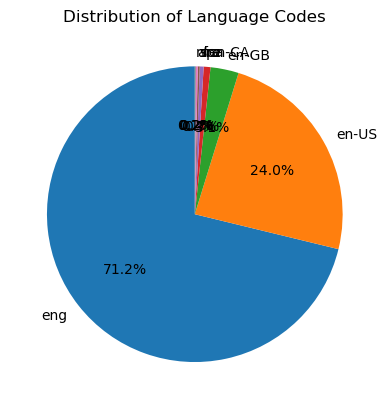

In [31]:
plt.pie(language_counts, labels = language_counts.index, startangle = 90, autopct = "%1.1f%%")
plt.title("Distribution of Language Codes")
plt.show()

In [39]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [42]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False)

Author_Rating
Intermediate    101400.272569
Famous           98295.250000
Novice           87318.464286
Excellent        83804.800595
Name: Book_ratings_count, dtype: float64

In [43]:
df.groupby("language_code").size().sort_values(ascending=False)

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

In [47]:
df.groupby("Author_Rating")["Book_ratings_count"].max()

Author_Rating
Excellent       167848
Famous          206792
Intermediate    199872
Novice          155903
Name: Book_ratings_count, dtype: int64

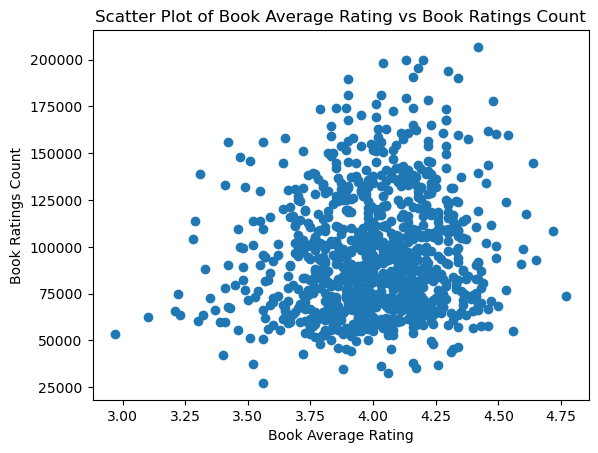

In [48]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"])
plt.title("Scatter Plot of Book Average Rating vs Book Ratings Count")
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.show()

In [49]:
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum()

Text(0, 0.5, 'Total Gross Sales')

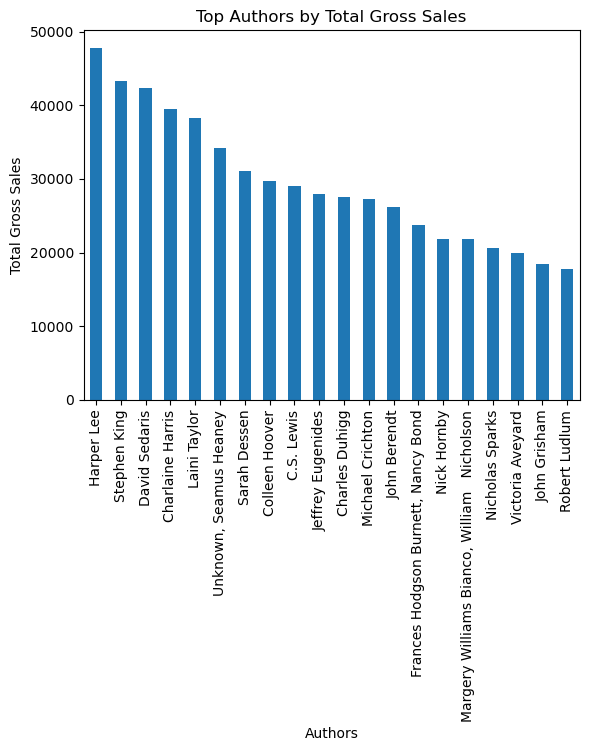

In [57]:
total_gross_sales_by_author.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title("Top Authors by Total Gross Sales")
plt.xlabel("Authors")
plt.ylabel("Total Gross Sales")

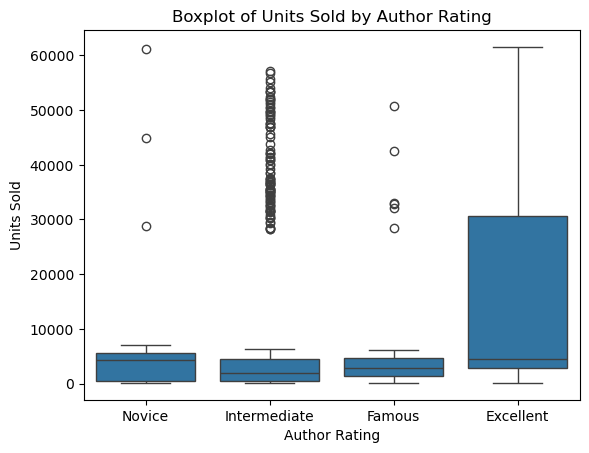

In [58]:
sns.boxplot(x = "Author_Rating", y = "units sold", data = df)
plt.title("Boxplot of Units Sold by Author Rating")
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.show()

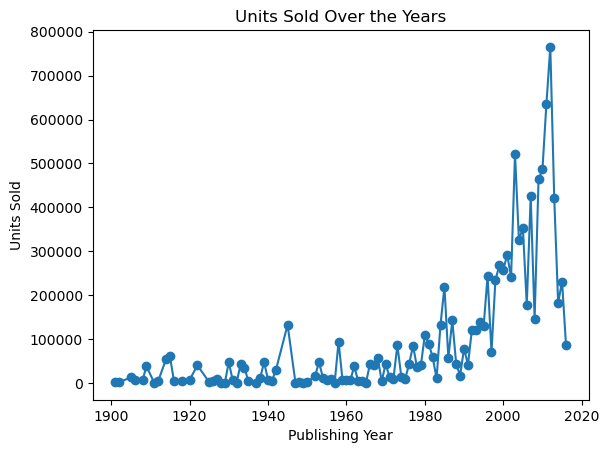

In [62]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind = 'line', marker = 'o')
plt.title("Units Sold Over the Years")
plt.xlabel("Publishing Year")
plt.ylabel("Units Sold")
plt.show()